# Explorative Data Analysis

## 1. Preprocessing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from pathlib import Path
import os
from data_io import get_book
import sys
import math

Change the filenames here based on what you have downloaded

In [2]:
# metadata_filename = 'SPGC-metadata-2018-07-18.csv'
# counts_dirname = 'SPGC-counts-2018-07-18'
# tokens_dirname = 'SPGC-tokens-2018-07-18'

metadata_filename = 'metadata.csv'
counts_dirname = 'counts'
tokens_dirname = 'tokens'

metadata_df = pd.read_csv(metadata_filename)

metadata_df

id                                              title  \
0           PG0                                                NaN   
1           PG1  The Declaration of Independence of the United ...   
2           PG2  The United States Bill of Rights: The Ten Orig...   
3           PG3                John F. Kennedy's Inaugural Address   
4           PG4  Lincoln's Gettysburg Address: Given November 1...   
...         ...                                                ...   
57708   PG57710                                 A Son of the State   
57709   PG57711  Hudson Tercentenary: An historical retrospect ...   
57710   PG57712                                     Proses moroses   
57711   PG57713                        The Animal Parasites of Man   
57712  PG999999                                      Piccole anime   

                                   author  authoryearofbirth  \
0                                     NaN                NaN   
1                       Jefferson, Thomas             1743.0   
2                           United States                NaN   
3      Kennedy, John F. (John Fitzgerald)             1917.0   
4                        Lincoln, Abraham             1809.0   
...                                   ...                ...   
57708       Ridge, W. Pett (William Pett)                NaN   
57709                  Chamberlain, Frank                NaN   
57710                   Gourmont, Remy de             1858.0   
57711                     Theobald, F. V.                NaN   
57712                                 NaN                NaN   

       authoryearofdeath language  downloads  \
0                    NaN      NaN        NaN   
1                 1826.0   ['en']      604.0   
2                    NaN   ['en']      158.0   
3                 1963.0   ['en']       28.0   
4                 1865.0   ['en']       55.0   
...                  ...      ...        ...   
57708             1930.0   ['en']        0.0   
57709                NaN   ['en']        0.0   
57710             1915.0   ['fr']        0.0   
57711                NaN   ['en']        0.0   
57712                NaN      NaN        NaN   

                                                subjects  type  
0                                                  set()  Text  
1      {'United States -- History -- Revolution, 1775...  Text  
2      {'Civil rights -- United States -- Sources', '...  Text  
3      {'Presidents -- United States -- Inaugural add...  Text  
4      {'Consecration of cemeteries -- Pennsylvania -...  Text  
...                                                  ...   ...  
57708                                              set()  Text  
57709                                              set()  Text  
57710                                              set()  Text  
57711                                              set()  Text  
57712                                              set()  Text  

[57713 rows x 9 columns]

In [3]:
# metadata_df[ == 'The Federalist Papers']
# len(metadata_df['title'].unique())

pd.set_option('display.max_rows', None)

metadata_df = metadata_df.dropna(subset=['author'])

ids = metadata_df["title"]
metadata_df[ids.isin(ids[ids.duplicated()])].sort_values("title")

id                                              title  \
2185    PG2186  "Captains Courageous": A Story of the Grand Banks   
2224    PG2225  "Captains Courageous": A Story of the Grand Banks   
43300  PG43302  "The Kingdom of God Is Within You": Christiani...   
4601    PG4602  "The Kingdom of God Is Within You": Christiani...   
6895    PG6896               A Brief History of the United States   
6433    PG6434               A Brief History of the United States   
9824    PG9825                              A Calendar of Sonnets   
19503  PG19504                              A Calendar of Sonnets   
14552  PG14553                  A Catechism of Christian Doctrine   
14551  PG14552                  A Catechism of Christian Doctrine   
14550  PG14551                  A Catechism of Christian Doctrine   
1551    PG1551                              A Cathedral Courtship   
25492  PG25493                              A Cathedral Courtship   
25607  PG25608                         A Child's Garden of Verses   
25608  PG25609                         A Child's Garden of Verses   
28721  PG28722                         A Child's Garden of Verses   
136      PG136                         A Child's Garden of Verses   
25616  PG25617                         A Child's Garden of Verses   
19721  PG19722                         A Child's Garden of Verses   
25610  PG25611                         A Child's Garden of Verses   
26458  PG26459                         A Child's Garden of Verses   
25609  PG25610                         A Child's Garden of Verses   
9689    PG9690                       A Child's History of England   
699      PG699                       A Child's History of England   
9695    PG9696                                  A Christmas Carol   
19336  PG19337                                  A Christmas Carol   
24021  PG24022                                  A Christmas Carol   
19504  PG19505                                  A Christmas Carol   
20672  PG20673                                  A Christmas Carol   
6532    PG6533        A Connecticut Yankee in King Arthur's Court   
19505  PG19506        A Connecticut Yankee in King Arthur's Court   
86        PG86        A Connecticut Yankee in King Arthur's Court   
3173    PG3174                                       A Dog's Tale   
9018    PG9019                                       A Dog's Tale   
9016    PG9017                 A Double Barrelled Detective Story   
3179    PG3180                 A Double Barrelled Detective Story   
52124  PG52126                           A Dream of the North Sea   
14431  PG14432                           A Dream of the North Sea   
8128    PG8129                                  A Dreamer's Tales   
57275  PG57277                                  A Dreamer's Tales   
5259    PG5260                  A Duet, with an Occasional Chorus   
35347  PG35348                  A Duet, with an Occasional Chorus   
125      PG125                           A Girl of the Limberlost   
26219  PG26220                           A Girl of the Limberlost   
3048    PG3049                             A Group of Noble Dames   
9427    PG9428                             A Group of Noble Dames   
43600  PG43602  A History of Art for Beginners and Students: P...   
24725  PG24726  A History of Art for Beginners and Students: P...   
25631  PG25632  A History of Art for Beginners and Students: P...   
24061  PG24062                     A History of the United States   
52764  PG52766                     A History of the United States   
9007    PG9008                                     A Horse's Tale   
1086    PG1086                                     A Horse's Tale   
9713    PG9714                                     A House to Let   
2323    PG2324                                     A House to Let   
21120  PG21121                                A Houseful of Girls   
20080  PG20081                                A Houseful of Girls   
44771  PG4

In [4]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55451 entries, 1 to 57711
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 55451 non-null  object 
 1   title              55451 non-null  object 
 2   author             55451 non-null  object 
 3   authoryearofbirth  42946 non-null  float64
 4   authoryearofdeath  41850 non-null  float64
 5   language           55451 non-null  object 
 6   downloads          55451 non-null  float64
 7   subjects           55451 non-null  object 
 8   type               55451 non-null  object 
dtypes: float64(3), object(6)
memory usage: 4.2+ MB


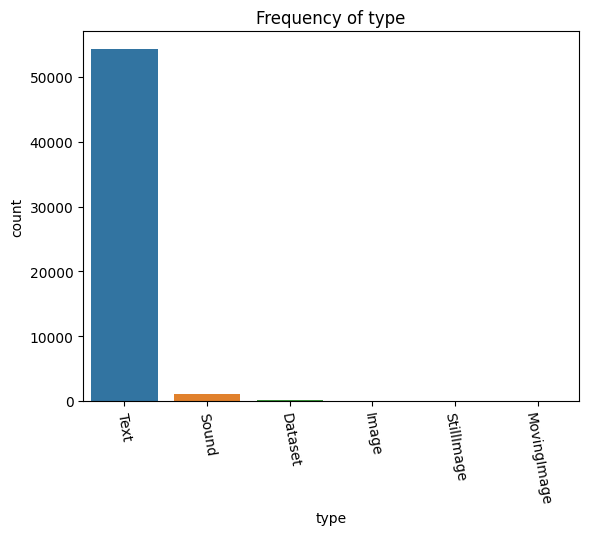

In [5]:
var = 'type'

sns.countplot(data=metadata_df, x=var, order=metadata_df[var].value_counts().index)
plt.title(f'Frequency of {var}')
plt.xticks(rotation=100000000)
plt.show()

In [6]:
metadata_df.type.unique()

array(['Text', 'Dataset', 'StillImage', 'MovingImage', 'Image', 'Sound'],
      dtype=object)

We can see that there are other data types than 'Text', we only want 'Text'

We want to see how many documents are there in each language. First we filter out all languages with too few documents

In [7]:
s = metadata_df['language'].value_counts()
language_df = metadata_df[metadata_df.language.isin(s[s > 10].index)]

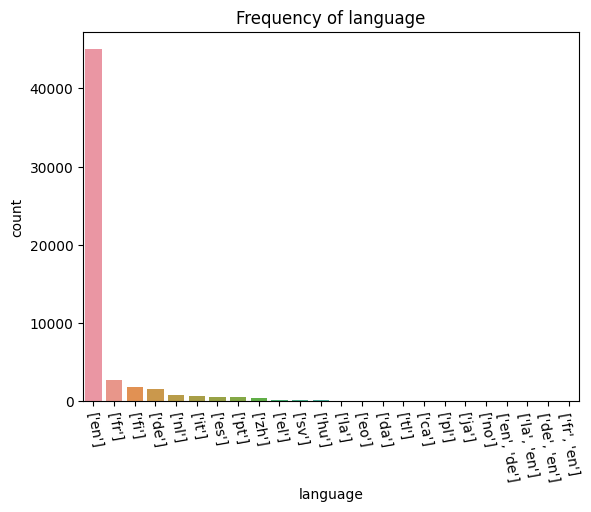

In [8]:
var = 'language'
sns.countplot(data=language_df, x=var, order=language_df[var].value_counts().index)
plt.title(f'Frequency of {var}')
plt.xticks(rotation=100000000)
plt.show()

We can see that there are a lot of different languages for the books. This project will only utilise the English documents. But it could be well adapted to a multi-lingual problems, or for a language other than English

In [9]:
metadata_df = metadata_df[(metadata_df.language == "['en']") & (metadata_df.type == 'Text')]

In [10]:
metadata_df[(metadata_df.author == 'Nietzsche, Friedrich Wilhelm') & (metadata_df.title == 'Thus Spake Zarathustra: A Book for All and None')]

id                                            title  \
1997  PG1998  Thus Spake Zarathustra: A Book for All and None   

                            author  authoryearofbirth  authoryearofdeath  \
1997  Nietzsche, Friedrich Wilhelm             1844.0             1900.0   

     language  downloads                                           subjects  \
1997   ['en']     3742.0  {'Philosophy, German', 'Superman (Philosophica...   

      type  
1997  Text

We also notice that this work by Nietzsche is originally in German, and it is a translated work. However, the name of the translator is not visible. This is a limitation for our data, that we have to take into consideration

Another limitation that can also be observed is that there are multiple works whose authors are numerous but only one of which is given authorship. For example, 'The Federalist Papers' has three authors as recorded by Gutenberg. However, only John Jay is given authorship. Another example is that 'The Communist Manifesto' has two authors: Karl Marx and Friedrich Engels, but only Engels' name is recorded. This is another limitation of the SGPC. https://www.gutenberg.org/ebooks/1404

In [11]:
metadata_df[metadata_df['title'].isin(['The Federalist Papers', 'The Communist Manifesto'])]

id                    title             author  authoryearofbirth  \
18      PG18    The Federalist Papers          Jay, John             1745.0   
61      PG61  The Communist Manifesto  Engels, Friedrich             1820.0   
1404  PG1404    The Federalist Papers          Jay, John             1745.0   

      authoryearofdeath language  downloads  \
18               1829.0   ['en']      461.0   
61               1895.0   ['en']     2608.0   
1404             1829.0   ['en']     2670.0   

                                               subjects  type  
18    {'Constitutional history -- United States -- S...  Text  
61                           {'Socialism', 'Communism'}  Text  
1404  {'Constitutional history -- United States -- S...  Text

We now need to keep only the entries that have both the counts and the tokens file

In [12]:
file_not_exist = set()

for id_ in metadata_df.id:
    try:
        open(f'{counts_dirname}/{id_}_counts.txt')
        open(f'{tokens_dirname}/{id_}_tokens.txt')
    except FileNotFoundError:
        file_not_exist.add(id_)

print(f'Number of ids that do not have a corresponding counts or tokens file is: {len(file_not_exist)}')

Number of ids that do not have a corresponding counts or tokens file is: 25252


Now we can drop all those entries

In [13]:
metadata_df = metadata_df[~metadata_df.id.isin(file_not_exist)]

We can now remove the columns (language, downloads, subjects, type) as they are not relevant to our modelling, and drop all rows that have a NULL values for any of the remaining columns 

In [14]:
SELECTED_COLUMNS = ['id', 'title', 'author', 'authoryearofbirth', 'authoryearofdeath']
metadata_df = metadata_df.dropna(subset=SELECTED_COLUMNS)
metadata_df = metadata_df[SELECTED_COLUMNS]
metadata_df = metadata_df.reset_index(drop=True)

metadata_df

id                                              title  \
0          PG4  Lincoln's Gettysburg Address: Given November 1...   
1          PG6                   Give Me Liberty or Give Me Death   
2          PG8         Abraham Lincoln's Second Inaugural Address   
3          PG9          Abraham Lincoln's First Inaugural Address   
4         PG15                                          Moby Dick   
5         PG54                           The Marvelous Land of Oz   
6         PG55                         The Wonderful Wizard of Oz   
7         PG58                                  Paradise Regained   
8         PG59  Discourse on the Method of Rightly Conducting ...   
9         PG61                            The Communist Manifesto   
10        PG62                                 A Princess of Mars   
11        PG64                                   The Gods of Mars   
12        PG68                                    Warlord of Mars   
13        PG72                               Thuvia, Maid of Mars   
14        PG73  The Red Badge of Courage: An Episode of the Am...   
15        PG77                      The House of the Seven Gables   
16        PG78                                 Tarzan of the Apes   
17        PG81                               The Return of Tarzan   
18        PG83    From the Earth to the Moon; and, Round the Moon   
19        PG85                               The Beasts of Tarzan   
20        PG88  Price/Cost Indexes from 1875 to 1989; Estimate...   
21        PG90                                  The Son of Tarzan   
22        PG92                      Tarzan and the Jewels of Opar   
23        PG96                                    The Monster Men   
24        PG97             Flatland: A Romance of Many Dimensions   
25        PG99           Collected Articles of Frederick Douglass   
26       PG100          The Complete Works of William Shakespeare   
27       PG102                   The Tragedy of Pudd'nhead Wilson   
28       PG103                    Around the World in Eighty Days   
29       PG104  Inaugural Address of Franklin Delano Roosevelt...   
30       PG105                                         Persuasion   
31       PG106                             Jungle Tales of Tarzan   
32       PG107                         Far from the Madding Crowd   
33       PG108                      The Return of Sherlock Holmes   
34       PG109                        Renascence, and Other Poems   
35       PG110            Tess of the d'Urbervilles: A Pure Woman   
36       PG111                                           Freckles   
37       PG113                                  The Secret Garden   
38       PG117                  Symphony No. 5 in C minor Opus 67   
39       PG119                                     A Tramp Abroad   
40       PG120                                    Treasure Island   
41       PG121                                   Northanger Abbey   
42       PG122                           The Return of the Native   
43       PG123                                At the Earth's Core   
44       PG125                           A Girl of the Limberlost   
45       PG126                                    The Poison Belt   
46       PG128                  The Arabian Nights Entertainments   
47       PG130                                          Orthodoxy   
48       PG131  The Pilgrim's Progress from this world to that...   
49       PG133                       The Damnation of Theron Ware   
50       PG135                                     Les Misérables   
51       PG136                         A Child's Garden of Verses   
52       PG137  Sara Crewe; Or, What Happened at Miss Minchin'...   
53       PG138  George Sand: Some Aspects of Her Life and Writ...   
54       PG139                                     The Lost World   
55       PG140                                         The Jungle   
56       PG141                                     Mansfield Park   
57       P

Now we will put the counts, the total number of tokens, and all the tokens into a dictionary for lookup in further EDA analysis and training later on. We will also remove anything that cannot be parsed correctly

In [15]:
docs = {}
for i, row in metadata_df.iterrows():
    docs[row['id']] = {'counts': {}, 'num_tokens': 0, 'tokens': []}

In [16]:
i = 0
error_ids = set()
for id_ in metadata_df.id:
    try:
        cur_counts = {}
        cur_counts = get_book(id_, os.path.join(counts_dirname), level='counts')
        docs[id_]['counts'] = cur_counts
        docs[id_]['num_tokens'] = np.sum(np.fromiter(cur_counts.values(), dtype=int))
    except Exception as e:
        error_ids.add(id_)

In [17]:
for k, v in docs.items():
    if docs[k]['num_tokens'] <= 0:
        error_ids.add(k)
        
for id_ in error_ids:
    del docs[id_]

In [18]:
metadata_df = metadata_df[~metadata_df.id.isin(error_ids)].reset_index()

In [19]:
error_ids = set()
for id_ in metadata_df.id:
    try:
        docs[id_]['tokens'] = ' '.join(get_book(id_, os.path.join(tokens_dirname), level='tokens'))
    except Exception as e:
        print(e, id_)
        error_ids.add(id_)

'utf-8' codec can't decode byte 0xc3 in position 1168: invalid continuation byte PG46381
'utf-8' codec can't decode byte 0xa9 in position 3929: invalid start byte PG46590


In [20]:
for id_ in error_ids:
    del docs[id_]

metadata_df = metadata_df[~metadata_df.id.isin(error_ids)].reset_index()

Now we try to get all of the duplicated books which have the same title and author, and remove the ones with less number of tokens

# NEED TO MAKE THIS ONE SINGLE COMPUTATION WITH THE REST AT THE BOTTOM

In [21]:
tokens_doc = {'id': [], 'num_tokens': []}
for k, v in docs.items():
    tokens_doc['id'].append(k)
    tokens_doc['num_tokens'].append(v['num_tokens'])

b = pd.DataFrame.from_dict(tokens_doc)
metadata_numtoken_df = pd.merge(metadata_df[['id', 'title', 'author']], tokens_df, on='id')

NameError: name 'tokens_df' is not defined

In [ ]:
# https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python
titles = metadata_numtoken_df["title"]
titles_authors = metadata_numtoken_df[["title", "author"]]
duplicated_entries = metadata_numtoken_df[titles.isin(titles[titles_authors.duplicated()])].sort_values("title")
duplicated_entries

In [ ]:
unique_highest_num_token = duplicated_entries.groupby(['title', 'author']).max()
unique_highest_num_token

In [ ]:
non_unique_highest_num_token = duplicated_entries[~duplicated_entries.id.isin(unique_highest_num_token.id)]
non_unique_highest_num_token

In [ ]:
metadata_df = metadata_df[~metadata_df.id.isin(non_unique_highest_num_token.id)][SELECTED_COLUMNS].reset_index(drop=True)

We confirm that we have selected the correct rows

In [ ]:
metadata_df[metadata_df.title =='A Dream of the North Sea']

In [ ]:
metadata_df

This is the entry with the PGID which has the highest number of tokens

**Export preprocessed dataframe**

In [ ]:
metadata_df[['id', 'author']]

In [ ]:
tokens_doc = {'id': [], 'text': []}
for k, v in docs.items():
    tokens_doc['id'].append(k)
    tokens_doc['text'].append(v['tokens'])

tokens_df = pd.DataFrame.from_dict(tokens_doc)

In [ ]:
preprocessed_df = pd.merge(metadata_df[['id', 'author']], tokens_df, on='id')

In [ ]:
preprocessed_df

In [ ]:
preprocessed_df.to_csv('preprocessed.csv', index=False)

## 2. Data Analysis

### a. Text

In [ ]:
def plot_loghist(x, bins):
    '''https://stackoverflow.com/questions/47850202/plotting-a-histogram-on-a-log-scale-with-matplotlib'''
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins)
    plt.xscale('log')

In [ ]:
num_words = [docs[k]['num_tokens'] for k in docs.keys()]

In [ ]:
plot_loghist(num_words, 100)
plt.title('Histogram of No. of Tokens Per Document Over No. of Docs')
plt.show()

We can see that most documents have the number of tokens around 10^5, or otherwise 10^4

In [ ]:
for id_ in metadata_df.id:
    docs[id_]['num_unique'] = len(docs[id_]['counts'].keys())

num_tokens = [docs[k]['num_unique'] for k in docs.keys()]

In [ ]:
plot_loghist(num_tokens, 100)
plt.title('Histogram of No. of Unique Tokens Per Document Over No. of Docs')
plt.show()

We can see that most documents have the number of unique tokens a little bit less than 10^4

In [ ]:
word_freq = {}
for k in docs.keys():
    word_freq.update(docs[k]['counts'])

In [ ]:
# https://stackoverflow.com/questions/43145199/create-wordcloud-from-dictionary-values
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(word_freq)
plt.title('Word Cloud of 50 Most Frequently Used Words')
plt.imshow(wc)

### b. Author

In [ ]:
plot_loghist(metadata_df['author'].value_counts(), 10)
plt.title('Number of works per author')
plt.show()

In [ ]:
metadata_df[['authoryearofbirth', 'authoryearofdeath']].describe()

In [ ]:
continuous_vars = ['authoryearofbirth', 'authoryearofdeath']
for var in continuous_vars:
    sns.histplot(data=metadata_df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

In [ ]:
sns.lineplot(x = metadata_df['authoryearofbirth'].value_counts().index, y=metadata_df['authoryearofbirth'].value_counts())
plt.title('No. Books in English by Year of Birth of Authors')
plt.xlabel('Year of Birth of Author')
plt.ylabel('Number of Works')

plt.show()

We can see that most English books in the dataset are written by people born around the 1800

In [ ]:
ana_year_df = metadata_df[['author', 'authoryearofbirth']]
ana_year_df.insert(2, 'generation', ana_year_df['authoryearofbirth'].apply(lambda x: math.floor(x * 0.1)*10), True)

counts = ana_year_df.groupby('generation')['author'].count().sort_values(ascending=False).head(30)
sns.lineplot(x = counts.index, y=counts)
plt.title('How many authors are in a given generation')
plt.xlabel('Generation')
plt.ylabel('Number of authors')
plt.show()

By extension, the generation with the most amount of authors are in the late 1800s